In [1]:
!pip3 install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 17.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [7]:
from pulp import *

# 定義問題
prob = LpProblem("Integer Programming Problem", LpMaximize)

# 定義變數
x1 = LpVariable("x1", 0, 10, cat="Integer")
x2 = LpVariable("x2", 0, 10, cat="Integer")
z = LpVariable("z", 0, 1, cat='Binary')

# M1 和 M2 是大 M 法中的大 M，這裡我們假設它們都是一個很大的數
M1 = 24
M2 = 22

# 定義目標函數
prob += x1 + x2

# 定義約束條件
prob += 2*x1 + x2 - 6 <= M1*z
prob += x1 + 2*x2 - 8 <= M2*(1-z)
prob += x1 <= 10
prob += x2 <= 10

# 解決問題
prob.solve()

# 輸出結果
# print("Status:", LpStatus[prob.status])
# print("Optimal Solution to the problem: ", value(prob.objective))
print("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/xin/opt/anaconda3/envs/or/lib/python3.12/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/kv/p_ttkqy56xb1h3zy2c7pxgp00000gn/T/6ba0a174842a485ea264205f03c14f7b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/kv/p_ttkqy56xb1h3zy2c7pxgp00000gn/T/6ba0a174842a485ea264205f03c14f7b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 26 RHS
At line 31 BOUNDS
At line 35 ENDATA
Problem MODEL has 4 rows, 3 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12.4571 - 0.00 seconds
Cgl0003I 0 fixed, 2 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 2 rows, 3 columns (3 integer (1 of which binary)) and 6 elements
Cutoff i

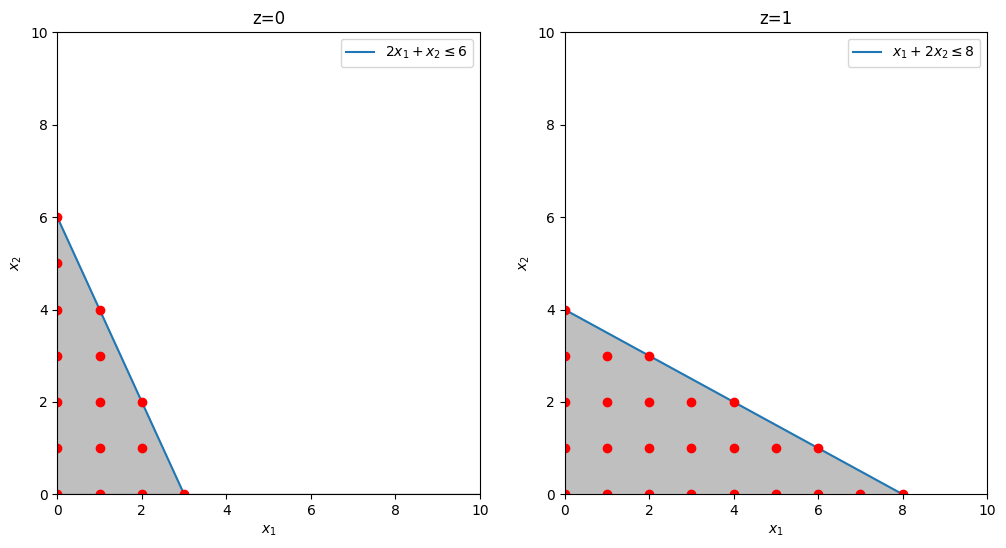

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定義變數範圍
x = np.linspace(0, 10, 400)
y = np.linspace(0, 10, 400)

# 定義約束
y1 = (6 - 2*x) / 1
y2 = (8 - x) / 2

# 繪製約束
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, label=r'$2x_1 + x_2 \leq 6$')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# 填充可行區域
y3 = np.minimum(y1, 10)
plt.fill_between(x, 0, y3, where=y>=0, color='grey', alpha=0.5)

# 繪製整數點
for i in range(11):
    for j in range(11):
        if 2*i + j <= 6:
            plt.plot(i, j, 'ro')

plt.title('z=0')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y2, label=r'$x_1 + 2x_2 \leq 8$')
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

# 填充可行區域
y4 = np.minimum(y2, 10)
plt.fill_between(x, 0, y4, where=y>=0, color='grey', alpha=0.5)

# 繪製整數點
for i in range(11):
    for j in range(11):
        if i + 2*j <= 8:
            plt.plot(i, j, 'ro')

plt.title('z=1')
plt.legend()

plt.show()

In [14]:
from pulp import *

# 定義問題
prob = LpProblem("Job Scheduling Problem", LpMinimize)

# 定義變數
w = LpVariable.dicts("w", range(1, 11), lowBound=0)
x = LpVariable.dicts("x", range(1, 11), lowBound=0)
z = LpVariable.dicts("z", (range(1, 11), range(1, 11)), cat='Binary')
M = 73

# 定義目標函數
prob += lpSum(w[j] for j in range(1, 11))

# 定義約束條件
for j in range(1, 11):
    prob += w[j] >= x[j] - due_times[j-1]
    prob += x[j] >= processing_times[j-1]

for i in range(1, 11):
    for j in range(i+1, 11):
        prob += x[i] + processing_times[j-1] - x[j] <= M*z[(i, j)]
        prob += x[j] + processing_times[i-1] - x[i] <= M*(1 - z[(i, j)])

# 解決問題
prob.solve()

# 輸出結果
print("Status:", LpStatus[prob.status])
print("Optimal Solution to the problem: ", value(prob.objective))
print("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)

IndexError: list index out of range